# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy

In [2]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4*np.random.rand(s_size, a_size)  # weights for simple linear policy: state_space x action_space
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state):
        probs = self.forward(state)
        #action = np.random.choice(2, p=probs) # option 1: stochastic policy
        action = np.argmax(probs)              # option 2: deterministic policy
        return action

observation space: Box(4,)
action space: Discrete(2)


### 3. Train the Agent with Stochastic Policy Search

In [3]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

policy = Policy()

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale / 2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_w
            break
        
    return scores
            
scores = hill_climbing()

Episode 100	Average Score: 175.24
Environment solved in 13 episodes!	Average Score: 196.21


### 4. Plot the Scores

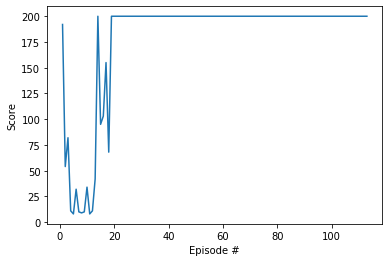

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [13]:
env = gym.make('CartPole-v0')
state = env.reset()
for t in range(800):
    action = policy.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    print(state, reward, done, t)
    #if done:
        #break 

env.close()

[-0.01949117 -0.17538041 -0.0019486   0.27257988] 1.0 False 0
[-0.02299878  0.0197693   0.003503   -0.02071701] 1.0 False 1
[-0.02260339 -0.17540272  0.00308866  0.27306909] 1.0 False 2
[-0.02611145  0.01967503  0.00855004 -0.01863806] 1.0 False 3
[-0.02571795  0.21467332  0.00817728 -0.30861114] 1.0 False 4
[-0.02142448  0.01943582  0.00200505 -0.01336058] 1.0 False 5
[-0.02103577  0.21452896  0.00173784 -0.30541021] 1.0 False 6
[-0.01674519  0.01938229 -0.00437036 -0.01217972] 1.0 False 7
[-0.01635754  0.21456664 -0.00461396 -0.30623834] 1.0 False 8
[-0.01206621  0.01951074 -0.01073872 -0.0150141 ] 1.0 False 9
[-0.01167599 -0.17545557 -0.01103901  0.27426138] 1.0 False 10
[-0.0151851   0.01982213 -0.00555378 -0.02188273] 1.0 False 11
[-0.01478866 -0.17521973 -0.00599143  0.26904276] 1.0 False 12
[-0.01829306  0.0199872  -0.00061058 -0.02552387] 1.0 False 13
[-0.01789331 -0.17512598 -0.00112105  0.26696635] 1.0 False 14
[-0.02139583  0.02001195  0.00421827 -0.02606995] 1.0 False 15
[-

[-0.00518624  0.01922301  0.00170455 -0.00866639] 1.0 False 135
[-0.00480178  0.21432047  0.00153122 -0.30081102] 1.0 False 136
[-0.00051537  0.01917673 -0.004485   -0.00764557] 1.0 False 137
[-1.31830927e-04  2.14362717e-01 -4.63790775e-03 -3.01740190e-01] 1.0 False 138
[ 0.00415542  0.01930717 -0.01067271 -0.01052356] 1.0 False 139
[ 0.00454157  0.21458055 -0.01088318 -0.30655466] 1.0 False 140
[ 0.00883318  0.01961536 -0.01701428 -0.01732378] 1.0 False 141
[ 0.00922548 -0.17525851 -0.01736075  0.26994275] 1.0 False 142
[ 0.00572031  0.02010683 -0.0119619  -0.0281649 ] 1.0 False 143
[ 0.00612245 -0.17484156 -0.01252519  0.26072004] 1.0 False 144
[ 0.00262562  0.02045693 -0.00731079 -0.03588702] 1.0 False 145
[ 0.00303476 -0.17455942 -0.00802853  0.25448034] 1.0 False 146
[-0.00045643  0.02067624 -0.00293893 -0.04072408] 1.0 False 147
[-4.29048958e-05 -1.74403447e-01 -3.75340910e-03  2.51030141e-01] 1.0 False 148
[-0.00353097  0.0207719   0.00126719 -0.04283432] 1.0 False 149
[-0.0031

[-0.00206814 -0.17504761  0.01143831  0.26524543] 1.0 True 270
[-0.00556909  0.01990924  0.01674322 -0.02380791] 1.0 True 271
[-0.0051709   0.21478712  0.01626706 -0.31116149] 1.0 True 272
[-0.00087516  0.01943724  0.01004383 -0.01339312] 1.0 True 273
[-0.00048642  0.21441372  0.00977597 -0.30289026] 1.0 True 274
[ 0.00380186  0.01915381  0.00371817 -0.00714031] 1.0 True 275
[ 0.00418493  0.21422224  0.00357536 -0.29864779] 1.0 True 276
[ 0.00846938  0.01904951 -0.0023976  -0.00483941] 1.0 True 277
[ 0.00885037  0.21420577 -0.00249438 -0.29827784] 1.0 True 278
[ 0.01313449  0.01911946 -0.00845994 -0.00638264] 1.0 True 279
[ 0.01351687  0.21436171 -0.00858759 -0.30172273] 1.0 True 280
[ 0.01780411  0.0193632  -0.01462205 -0.01176047] 1.0 True 281
[ 0.01819137 -0.17554603 -0.01485726  0.27627339] 1.0 True 282
[ 0.01468045  0.0197847  -0.00933179 -0.02105824] 1.0 True 283
[ 0.01507615 -0.17520219 -0.00975295  0.26866585] 1.0 True 284
[ 0.0115721   0.02005758 -0.00437964 -0.0270772 ] 1.0 T

[ 0.01891252  0.02005496 -0.00493945 -0.02701981] 1.0 True 401
[ 0.01931362 -0.17499581 -0.00547985  0.26410058] 1.0 True 402
[ 0.0158137   0.02020393 -0.00019784 -0.03030569] 1.0 True 403
[ 0.01621778 -0.17491518 -0.00080395  0.26231481] 1.0 True 404
[ 0.01271948  0.02021824  0.00444235 -0.03062159] 1.0 True 405
[ 0.01312384 -0.17496714  0.00382991  0.26345963] 1.0 True 406
[ 0.0096245   0.02009994  0.00909911 -0.02801284] 1.0 True 407
[ 0.0100265   0.21509023  0.00853885 -0.31781107] 1.0 True 408
[ 0.0143283   0.0198477   0.00218263 -0.02244757] 1.0 True 409
[ 0.01472526  0.21493829  0.00173368 -0.31444105] 1.0 True 410
[ 0.01902402  0.01979168 -0.00455514 -0.02121189] 1.0 True 411
[ 0.01941986 -0.17526465 -0.00497938  0.27003037] 1.0 True 412
[ 0.01591456  0.019928    0.00042123 -0.02421892] 1.0 True 413
[ 1.63131235e-02 -1.75199985e-01 -6.31520698e-05  2.68596883e-01] 1.0 True 414
[ 0.01280912  0.01992287  0.00530879 -0.02410596] 1.0 True 415
[ 0.01320758  0.21496828  0.00482667 -0

[ 0.01418315  0.01999432  0.00913021 -0.02568329] 1.0 True 535
[ 0.01458303  0.21498416  0.00861655 -0.31547161] 1.0 True 536
[ 0.01888272  0.01974053  0.00230711 -0.02008381] 1.0 True 537
[ 0.01927753  0.21482932  0.00190544 -0.31203793] 1.0 True 538
[ 0.02357411  0.01968028 -0.00433532 -0.01875469] 1.0 True 539
[ 0.02396772  0.21486413 -0.00471041 -0.31280231] 1.0 True 540
[ 0.028265    0.0198096  -0.01096646 -0.02160861] 1.0 True 541
[ 0.02866119 -0.17515338 -0.01139863  0.2675942 ] 1.0 True 542
[ 0.02515813  0.02012938 -0.00604675 -0.02866204] 1.0 True 543
[ 0.02556071 -0.17490533 -0.00661999  0.26210696] 1.0 True 544
[ 0.02206261  0.02031048 -0.00137785 -0.03265662] 1.0 True 545
[ 0.02246882 -0.17479168 -0.00203098  0.25959126] 1.0 True 546
[ 0.01897298  0.02035921  0.00316084 -0.03373157] 1.0 True 547
[ 0.01938017 -0.17480793  0.00248621  0.25994696] 1.0 True 548
[ 0.01588401  0.02027844  0.00768515 -0.03195075] 1.0 True 549
[ 0.01628958 -0.17495287  0.00704613  0.26314698] 1.0 T

[ 0.03322803 -0.17500172 -0.01154889  0.26424855] 1.0 True 670
[ 0.029728    0.02028315 -0.00626392 -0.03205452] 1.0 True 671
[ 0.03013366 -0.17474842 -0.00690501  0.25864551] 1.0 True 672
[ 0.02663869  0.02047143 -0.0017321  -0.03620733] 1.0 True 673
[ 0.02704812 -0.17462564 -0.00245624  0.2559286 ] 1.0 True 674
[ 0.02355561  0.02053129  0.00266233 -0.03752805] 1.0 True 675
[ 0.02396623 -0.17462874  0.00191177  0.25599368] 1.0 True 676
[ 0.02047366  0.02046587  0.00703164 -0.03608564] 1.0 True 677
[ 0.02088298 -0.17475621  0.00630993  0.25880752] 1.0 True 678
[ 0.01738785  0.0202751   0.01148608 -0.0318785 ] 1.0 True 679
[ 0.01779336  0.21523046  0.01084851 -0.32091543] 1.0 True 680
[ 0.02209796  0.01995571  0.0044302  -0.02483114] 1.0 True 681
[ 0.02249708  0.21501385  0.00393358 -0.316113  ] 1.0 True 682
[ 0.02679736  0.01983609 -0.00238868 -0.02219216] 1.0 True 683
[ 0.02719408  0.21499222 -0.00283253 -0.31562779] 1.0 True 684
[ 0.03149392  0.01991073 -0.00914508 -0.02383949] 1.0 T